In [1]:
import tensorflow as tf
import os
from tensorflow.keras.preprocessing import image
from tensorflow.keras.utils import to_categorical
import numpy as np
import scipy.io as sio
from numpy import expand_dims
from numpy import asarray
from PIL import Image
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Model
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from skimage.filters import gabor_kernel
from scipy import ndimage as nd        
import matplotlib
import matplotlib.pyplot as plt    
from numpy.linalg import norm
from keras.optimizers import SGD, Adam
import graphviz
import pydot
from numpy import reshape
from sklearn.manifold import TSNE
import pandas as pd  
import seaborn as sns

In [2]:
data_path = 'E:/Sushree/Dataset/'

img_path = os.path.join(data_path,'Animals_with_Attributes2/JPEGImages/')
print(img_path)

num_classes = len(os.listdir(img_path))

print(num_classes)

def get_imlist(path, option):
    if option == 'jpg':
        return[os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]
    
def prepare_dataset(img_path, width, height, option):
    folder_list = os.listdir(img_path)
    num_classes = len(folder_list)
    images = []
    labels = []
    for i in range(len(folder_list)):
        print(i)
        img_list = get_imlist(os.path.join(img_path, folder_list[i]), option)
        for j in range(len(img_list)):
            img = image.load_img(img_list[j], target_size = (width, height))
            img = np.array(img)
            #img = np.true_divide(img,[255.0], out = None)
            img = np.divide(np.subtract(img, np.mean(img)), np.std(img))
            x = image.img_to_array(img)
            images.append(x)
            labels.append(i)
    images = np.array(images, dtype = np.float32)                             
    #labels = to_categorical(labels, num_classes)                             
    return images, labels  


width, height, ch = 224, 224, 3
images, labels = prepare_dataset(img_path, width, height,'jpg')

print(images.shape)
print(len(labels))

E:/Sushree/Dataset/Animals_with_Attributes2/JPEGImages/
50
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
(37322, 224, 224, 3)
37322


In [3]:
model = tf.keras.applications.resnet.ResNet101(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=None,
    pooling=None,
    classes=1000
)

model.summary()

x = model.output
out = GlobalAveragePooling2D()(x)

new_model = Model(inputs = model.input, outputs = out)
new_model.summary()


for layer in new_model.layers:
    layer.trainable = False
    

Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, None, None,   0           ['input_1[0][0]']                
                                3)                                                                
                                                                                                  
 conv1_conv (Conv2D)            (None, None, None,   9472        ['conv1_pad[0][0]']              
                                64)                                                       

                                                                                                  
 conv2_block2_add (Add)         (None, None, None,   0           ['conv2_block1_out[0][0]',       
                                256)                              'conv2_block2_3_bn[0][0]']      
                                                                                                  
 conv2_block2_out (Activation)  (None, None, None,   0           ['conv2_block2_add[0][0]']       
                                256)                                                              
                                                                                                  
 conv2_block3_1_conv (Conv2D)   (None, None, None,   16448       ['conv2_block2_out[0][0]']       
                                64)                                                               
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block2_2_bn (BatchNormal  (None, None, None,   512        ['conv3_block2_2_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block2_2_relu (Activatio  (None, None, None,   0          ['conv3_block2_2_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block2_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block2_2_relu[0][0]']    
                                512)                                                              
          

 conv4_block1_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block1_1_relu (Activatio  (None, None, None,   0          ['conv4_block1_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block1_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block1_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block1_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block1_2_conv[0][0]']    
 ization) 

                                                                                                  
 conv4_block3_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block3_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block3_add (Add)         (None, None, None,   0           ['conv4_block2_out[0][0]',       
                                1024)                             'conv4_block3_3_bn[0][0]']      
                                                                                                  
 conv4_block3_out (Activation)  (None, None, None,   0           ['conv4_block3_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_blo

 ization)                       256)                                                              
                                                                                                  
 conv4_block6_2_relu (Activatio  (None, None, None,   0          ['conv4_block6_2_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block6_3_conv (Conv2D)   (None, None, None,   263168      ['conv4_block6_2_relu[0][0]']    
                                1024)                                                             
                                                                                                  
 conv4_block6_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block6_3_conv[0][0]']    
 ization)                       1024)                                                             
          

 conv4_block9_1_relu (Activatio  (None, None, None,   0          ['conv4_block9_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block9_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block9_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block9_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block9_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block9_2_relu (Activatio  (None, None, None,   0          ['conv4_block9_2_bn[0][0]']      
 n)       

                                                                                                  
 conv4_block12_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block11_out[0][0]']      
                                256)                                                              
                                                                                                  
 conv4_block12_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block12_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block12_1_relu (Activati  (None, None, None,   0          ['conv4_block12_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_blo

 lization)                      1024)                                                             
                                                                                                  
 conv4_block14_add (Add)        (None, None, None,   0           ['conv4_block13_out[0][0]',      
                                1024)                             'conv4_block14_3_bn[0][0]']     
                                                                                                  
 conv4_block14_out (Activation)  (None, None, None,   0          ['conv4_block14_add[0][0]']      
                                1024)                                                             
                                                                                                  
 conv4_block15_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block14_out[0][0]']      
                                256)                                                              
          

 conv4_block17_2_relu (Activati  (None, None, None,   0          ['conv4_block17_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block17_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block17_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block17_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block17_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_block17_add (Add)        (None, None, None,   0           ['conv4_block16_out[0][0]',      
          

                                                                                                  
 conv4_block20_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block20_1_relu[0][0]']   
                                256)                                                              
                                                                                                  
 conv4_block20_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block20_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block20_2_relu (Activati  (None, None, None,   0          ['conv4_block20_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_blo

                                256)                                                              
                                                                                                  
 conv4_block23_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block23_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block23_1_relu (Activati  (None, None, None,   0          ['conv4_block23_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block23_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block23_1_relu[0][0]']   
                                256)                                                              
          

 conv5_block2_3_conv (Conv2D)   (None, None, None,   1050624     ['conv5_block2_2_relu[0][0]']    
                                2048)                                                             
                                                                                                  
 conv5_block2_3_bn (BatchNormal  (None, None, None,   8192       ['conv5_block2_3_conv[0][0]']    
 ization)                       2048)                                                             
                                                                                                  
 conv5_block2_add (Add)         (None, None, None,   0           ['conv5_block1_out[0][0]',       
                                2048)                             'conv5_block2_3_bn[0][0]']      
                                                                                                  
 conv5_block2_out (Activation)  (None, None, None,   0           ['conv5_block2_add[0][0]']       
          

                                                                                                  
 conv2_block1_2_relu (Activatio  (None, None, None,   0          ['conv2_block1_2_bn[0][0]']      
 n)                             64)                                                               
                                                                                                  
 conv2_block1_0_conv (Conv2D)   (None, None, None,   16640       ['pool1_pool[0][0]']             
                                256)                                                              
                                                                                                  
 conv2_block1_3_conv (Conv2D)   (None, None, None,   16640       ['conv2_block1_2_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv2_blo

                                128)                                                              
                                                                                                  
 conv3_block1_1_bn (BatchNormal  (None, None, None,   512        ['conv3_block1_1_conv[0][0]']    
 ization)                       128)                                                              
                                                                                                  
 conv3_block1_1_relu (Activatio  (None, None, None,   0          ['conv3_block1_1_bn[0][0]']      
 n)                             128)                                                              
                                                                                                  
 conv3_block1_2_conv (Conv2D)   (None, None, None,   147584      ['conv3_block1_1_relu[0][0]']    
                                128)                                                              
          

 conv3_block3_3_conv (Conv2D)   (None, None, None,   66048       ['conv3_block3_2_relu[0][0]']    
                                512)                                                              
                                                                                                  
 conv3_block3_3_bn (BatchNormal  (None, None, None,   2048       ['conv3_block3_3_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv3_block3_add (Add)         (None, None, None,   0           ['conv3_block2_out[0][0]',       
                                512)                              'conv3_block3_3_bn[0][0]']      
                                                                                                  
 conv3_block3_out (Activation)  (None, None, None,   0           ['conv3_block3_add[0][0]']       
          

                                                                                                  
 conv4_block2_1_relu (Activatio  (None, None, None,   0          ['conv4_block2_1_bn[0][0]']      
 n)                             256)                                                              
                                                                                                  
 conv4_block2_2_conv (Conv2D)   (None, None, None,   590080      ['conv4_block2_1_relu[0][0]']    
                                256)                                                              
                                                                                                  
 conv4_block2_2_bn (BatchNormal  (None, None, None,   1024       ['conv4_block2_2_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_blo

                                1024)                                                             
                                                                                                  
 conv4_block5_1_conv (Conv2D)   (None, None, None,   262400      ['conv4_block4_out[0][0]']       
                                256)                                                              
                                                                                                  
 conv4_block5_1_bn (BatchNormal  (None, None, None,   1024       ['conv4_block5_1_conv[0][0]']    
 ization)                       256)                                                              
                                                                                                  
 conv4_block5_1_relu (Activatio  (None, None, None,   0          ['conv4_block5_1_bn[0][0]']      
 n)                             256)                                                              
          

 conv4_block7_3_bn (BatchNormal  (None, None, None,   4096       ['conv4_block7_3_conv[0][0]']    
 ization)                       1024)                                                             
                                                                                                  
 conv4_block7_add (Add)         (None, None, None,   0           ['conv4_block6_out[0][0]',       
                                1024)                             'conv4_block7_3_bn[0][0]']      
                                                                                                  
 conv4_block7_out (Activation)  (None, None, None,   0           ['conv4_block7_add[0][0]']       
                                1024)                                                             
                                                                                                  
 conv4_block8_1_conv (Conv2D)   (None, None, None,   262400      ['conv4_block7_out[0][0]']       
          

                                                                                                  
 conv4_block10_2_relu (Activati  (None, None, None,   0          ['conv4_block10_2_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block10_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block10_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block10_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block10_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_blo

 on)                            256)                                                              
                                                                                                  
 conv4_block13_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block13_1_relu[0][0]']   
                                256)                                                              
                                                                                                  
 conv4_block13_2_bn (BatchNorma  (None, None, None,   1024       ['conv4_block13_2_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block13_2_relu (Activati  (None, None, None,   0          ['conv4_block13_2_bn[0][0]']     
 on)                            256)                                                              
          

 conv4_block16_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block15_out[0][0]']      
                                256)                                                              
                                                                                                  
 conv4_block16_1_bn (BatchNorma  (None, None, None,   1024       ['conv4_block16_1_conv[0][0]']   
 lization)                      256)                                                              
                                                                                                  
 conv4_block16_1_relu (Activati  (None, None, None,   0          ['conv4_block16_1_bn[0][0]']     
 on)                            256)                                                              
                                                                                                  
 conv4_block16_2_conv (Conv2D)  (None, None, None,   590080      ['conv4_block16_1_relu[0][0]']   
          

                                                                                                  
 conv4_block18_add (Add)        (None, None, None,   0           ['conv4_block17_out[0][0]',      
                                1024)                             'conv4_block18_3_bn[0][0]']     
                                                                                                  
 conv4_block18_out (Activation)  (None, None, None,   0          ['conv4_block18_add[0][0]']      
                                1024)                                                             
                                                                                                  
 conv4_block19_1_conv (Conv2D)  (None, None, None,   262400      ['conv4_block18_out[0][0]']      
                                256)                                                              
                                                                                                  
 conv4_blo

 on)                            256)                                                              
                                                                                                  
 conv4_block21_3_conv (Conv2D)  (None, None, None,   263168      ['conv4_block21_2_relu[0][0]']   
                                1024)                                                             
                                                                                                  
 conv4_block21_3_bn (BatchNorma  (None, None, None,   4096       ['conv4_block21_3_conv[0][0]']   
 lization)                      1024)                                                             
                                                                                                  
 conv4_block21_add (Add)        (None, None, None,   0           ['conv4_block20_out[0][0]',      
                                1024)                             'conv4_block21_3_bn[0][0]']     
          

 conv5_block1_2_conv (Conv2D)   (None, None, None,   2359808     ['conv5_block1_1_relu[0][0]']    
                                512)                                                              
                                                                                                  
 conv5_block1_2_bn (BatchNormal  (None, None, None,   2048       ['conv5_block1_2_conv[0][0]']    
 ization)                       512)                                                              
                                                                                                  
 conv5_block1_2_relu (Activatio  (None, None, None,   0          ['conv5_block1_2_bn[0][0]']      
 n)                             512)                                                              
                                                                                                  
 conv5_block1_0_conv (Conv2D)   (None, None, None,   2099200     ['conv4_block23_out[0][0]']      
          

                                                                                                  
 conv5_block3_out (Activation)  (None, None, None,   0           ['conv5_block3_add[0][0]']       
                                2048)                                                             
                                                                                                  
 global_average_pooling2d (Glob  (None, 2048)        0           ['conv5_block3_out[0][0]']       
 alAveragePooling2D)                                                                              
                                                                                                  
Total params: 42,658,176
Trainable params: 42,552,832
Non-trainable params: 105,344
__________________________________________________________________________________________________


In [4]:
batch_size = 16

class DataGenerator(Sequence):
    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return int(np.ceil(len(self.x) / float(self.batch_size)))

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) * self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) * self.batch_size]
        return batch_x, batch_y
    

In [5]:
split_path = os.path.join(data_path,'data/xlsa17/data/AWA2/att_splits.mat')
matcontent = sio.loadmat(split_path)
trainval_loc = matcontent['trainval_loc'].squeeze() - 1


test_unseen_loc = matcontent['test_unseen_loc'].squeeze() - 1


print(test_unseen_loc, len(test_unseen_loc))

test_unseen_images = images[test_unseen_loc]
x_images = reshape(test_unseen_images, [test_unseen_images.shape[0], test_unseen_images.shape[1]*test_unseen_images.shape[2]*test_unseen_images.shape[3]])
print(x_images.shape)

num_of_classes = 10

test_unseen_labels = np.zeros(len(test_unseen_loc))
for i in range(len(test_unseen_loc)):
    test_unseen_labels[i] = labels[test_unseen_loc[i]]
print(len(test_unseen_labels))

test_unseen_gen = DataGenerator(test_unseen_images, test_unseen_labels, batch_size)  

test_unseen_visual_features = new_model.predict(test_unseen_gen, steps = len(test_unseen_images)//batch_size, verbose = 1)
print(test_unseen_visual_features.shape)

num_of_classes = 10
print(num_of_classes)

[ 1046  1047  1048 ... 35288 35289 35290] 7913
(7913, 150528)
7913
494/494 [==============================] - 24s 38ms/step
(7904, 2048)
10


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7904 samples in 0.010s...
[t-SNE] Computed neighbors for 7904 samples in 1.694s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7904
[t-SNE] Computed conditional probabilities for sample 2000 / 7904
[t-SNE] Computed conditional probabilities for sample 3000 / 7904
[t-SNE] Computed conditional probabilities for sample 4000 / 7904
[t-SNE] Computed conditional probabilities for sample 5000 / 7904
[t-SNE] Computed conditional probabilities for sample 6000 / 7904
[t-SNE] Computed conditional probabilities for sample 7000 / 7904
[t-SNE] Computed conditional probabilities for sample 7904 / 7904
[t-SNE] Mean sigma: 2.756086
[t-SNE] KL divergence after 250 iterations with early exaggeration: 90.115372
[t-SNE] KL divergence after 1000 iterations: 2.640112
(7904, 2)


[Text(0.5, 1.0, 'T-SNE projection')]

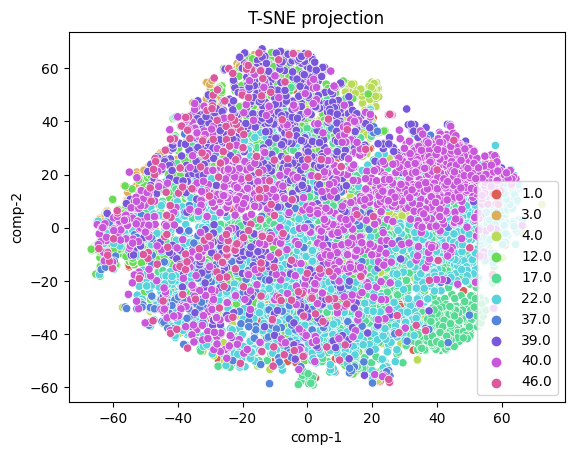

In [6]:

tsne = TSNE(n_components=2, verbose=1, random_state=123)
z = tsne.fit_transform(test_unseen_visual_features) 

print(z.shape)

df = pd.DataFrame()
df["y"] = test_unseen_labels[0:7904]
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(), palette=sns.color_palette("hls", num_of_classes), data=df).set(title="T-SNE projection")
